In [170]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import random
import matplotlib.pyplot as plt

In [31]:
dtm = pd.read_pickle("dtm_allrecipe.pkl")
#dtm

In [34]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

dtm_sets = dtm.applymap(encode_units)
dtm_sets

,acinus,active_dry_yeast,active_starter,adzuki_bean,agar_agar,allspice,allspice_berry,allspice_clove,almond,almond_butter,...,yellow_cake_mix,yellow_cake_mix_pudding,yellow_cornmeal,yellow_food,yoghurt,yogurt,yolk,zucchini,zwieback,zwieback_toast
ID,,,,,,,,,,,,,,,,,,,,,
BBC1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BBC10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BBC100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BBC1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BBC1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BBC1002,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
BBC1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BBC1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BBC1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
frequent_itemsets = apriori(dtm_sets, min_support=0.01, use_colnames=True)
#frequent_itemsets.head(20)

,support,itemsets
0,0.021413,(allspice)
1,0.053308,(almond)
2,0.035882,(almond_extract)
3,0.043229,(apple)
4,0.170855,(baking_powder)
5,0.136541,(baking_soda)
6,0.023698,(banana)
7,0.015276,(blueberry)
8,0.021547,(boiling_water)
9,0.015365,(brandy)


In [319]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, support_only=False)
rules.tail()
#rules[:3]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21935,(salt),"(butter, egg, vanilla, baking_soda, sugar, flour)",0.366349,0.013573,0.010706,0.029225,2.153083,0.005734,1.016122
21936,(vanilla),"(butter, egg, salt, baking_soda, sugar, flour)",0.250997,0.022757,0.010706,0.042656,1.874417,0.004995,1.020786
21937,(baking_soda),"(butter, egg, salt, vanilla, sugar, flour)",0.136541,0.026251,0.010706,0.078412,2.987018,0.007122,1.056599
21938,(sugar),"(butter, egg, salt, vanilla, baking_soda, flour)",0.555078,0.015186,0.010706,0.019288,1.270119,0.002277,1.004183
21939,(flour),"(butter, egg, salt, vanilla, baking_soda, sugar)",0.383819,0.011871,0.010706,0.027894,2.349769,0.006150,1.016483


In [302]:
rules[ (rules['lift'] >= 0.01) & (rules['confidence'] >= 0.6)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(allspice),(cinnamon),0.021413,0.196031,0.018725,0.874477,4.460912,0.014527,6.404953
27,(almond_extract),(sugar),0.035882,0.555078,0.022891,0.637953,1.149303,0.002974,1.228906
33,(apple),(cinnamon),0.043229,0.196031,0.028715,0.664249,3.388488,0.020241,2.394537
41,(apple),(sugar),0.043229,0.555078,0.027057,0.625907,1.127602,0.003062,1.189335
57,(baking_powder),(egg),0.170855,0.471621,0.131479,0.769533,1.631677,0.050900,2.292647
61,(baking_powder),(flour),0.170855,0.383819,0.127761,0.747771,1.948238,0.062183,2.442945
77,(baking_powder),(salt),0.170855,0.366349,0.118398,0.692973,1.891568,0.055806,2.063831
81,(baking_powder),(sugar),0.170855,0.555078,0.115755,0.677504,1.220557,0.020917,1.379621
95,(buttermilk),(baking_soda),0.026161,0.136541,0.018859,0.720890,5.279671,0.015287,3.093621
102,(baking_soda),(egg),0.136541,0.471621,0.109707,0.803478,1.703651,0.045312,2.688645


In [288]:
#list(rules.iloc[0].antecedents)
#rules.consequents[:i]

0                                         (allspice)
1                                         (cinnamon)
2                                         (allspice)
3                                              (egg)
4                                            (flour)
5                                         (allspice)
6                                           (nutmeg)
7                                         (allspice)
8                                             (salt)
9                                         (allspice)
10                                          (almond)
11                                          (butter)
12                                          (almond)
13                                        (cinnamon)
14                                           (flour)
15                                          (almond)
16                                          (almond)
17                                           (sugar)
18                                  (almond_ex

In [119]:
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])

C:\Users\ReetuSingh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\ReetuSingh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [121]:
len(support)

21940

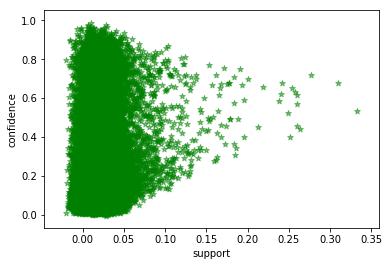

In [130]:
import random
import matplotlib.pyplot as plt

 
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

plt.scatter(support, confidence,   alpha=0.5, marker="*", c = 'g')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()